Importing Essential Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [ ]:
dataset = pd.read_csv('/content/customer_churn_dataset-training-master.csv')

dataset

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


Dataset Information

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


Summary Statistics

In [ ]:
dataset.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Checking Missing Values

In [ ]:
dataset.isna().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


Handling Missing Values

In [ ]:
dataset.dropna(inplace=True)
dataset.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


Checking for Duplicates

In [ ]:
dataset.duplicated().sum()

0

Outlier Analysis Using Boxplots for Numerical Variables

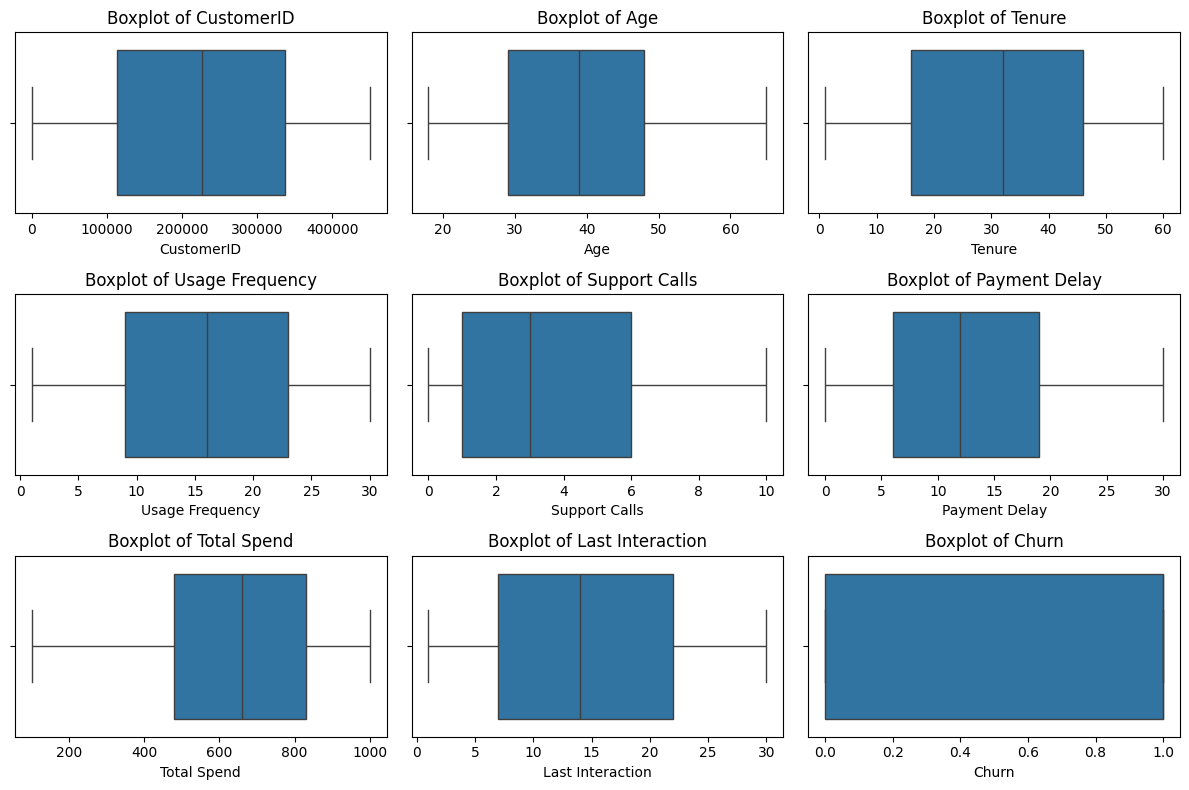

In [ ]:
import seaborn as sns

numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=dataset, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Scaling Numerical Features Using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])


Encoding Categorical Variable: Subscription Type Using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dataset['Subscription Type'] = label_encoder.fit_transform(dataset['Subscription Type'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])


Visualizing Feature Correlations Using a Heatmap

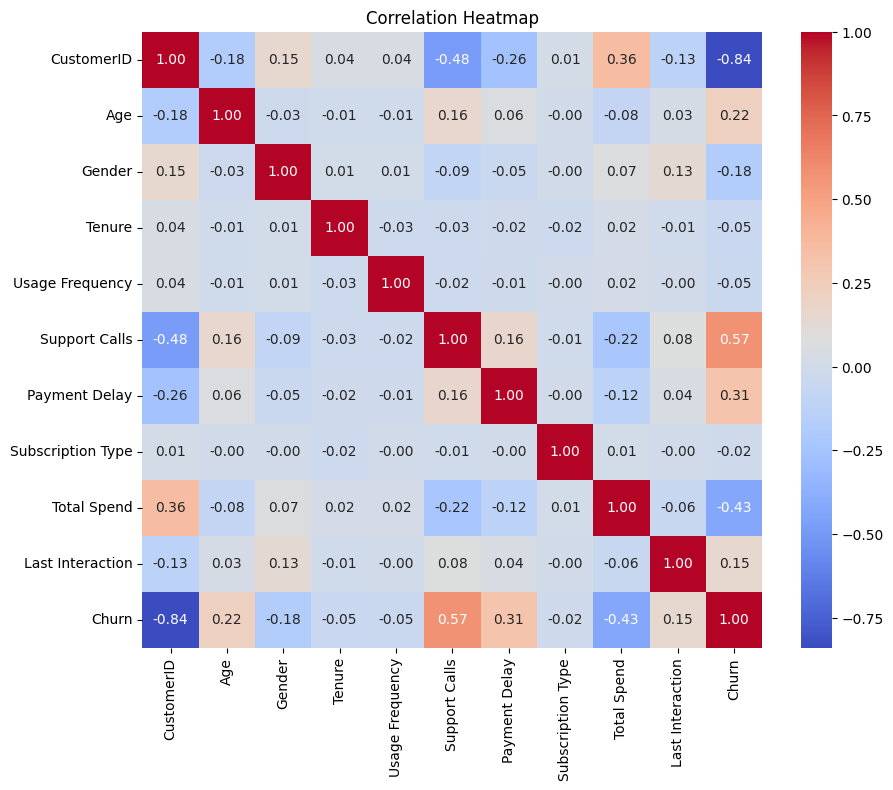

In [ ]:
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = dataset[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


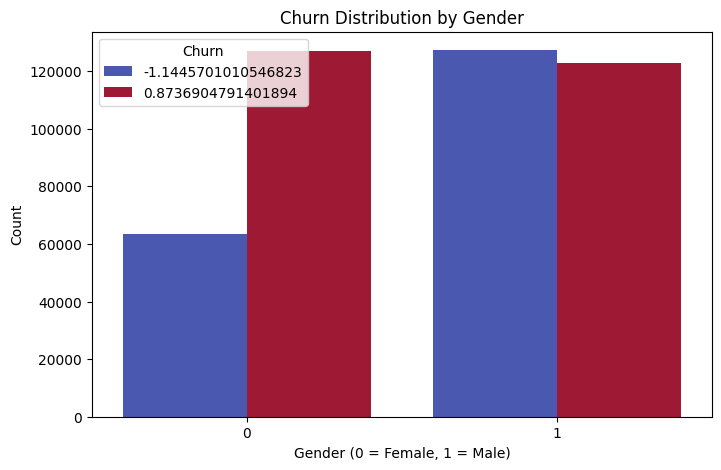

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='Gender', hue='Churn', palette="coolwarm")
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


Age Distribution by Churn Status Using Boxplot

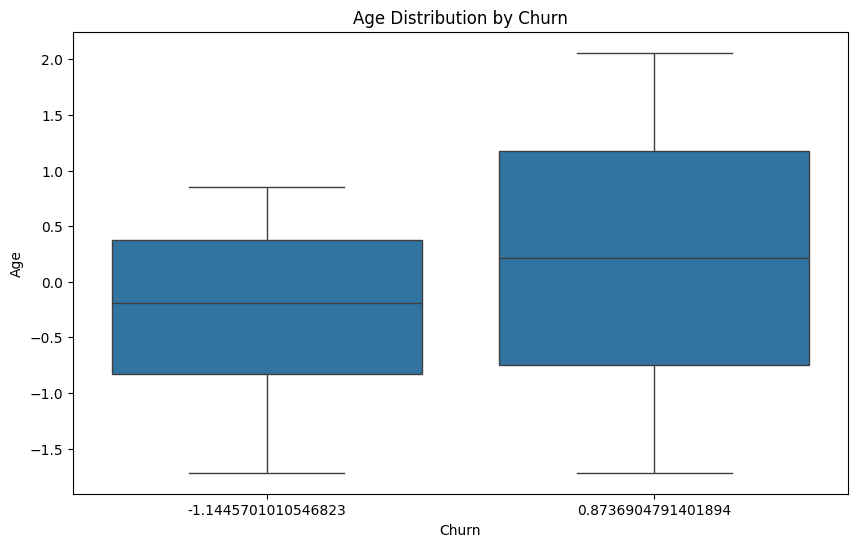

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Churn', y='Age')
plt.title('Age Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()


Impact of Support Calls on Customer Churn

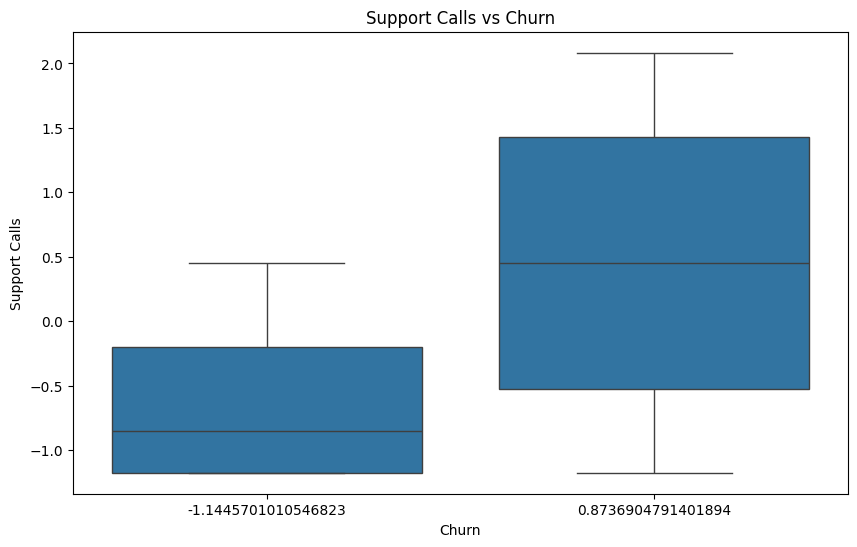

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Churn', y='Support Calls')
plt.title('Support Calls vs Churn')
plt.xlabel('Churn')
plt.ylabel('Support Calls')
plt.show()


Relationship Between Payment Delay and Customer Churn

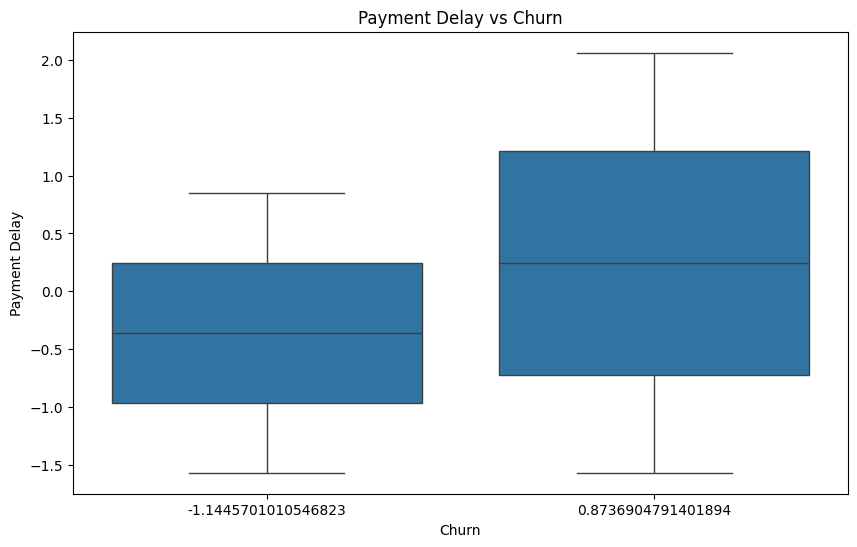

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Churn', y='Payment Delay')
plt.title('Payment Delay vs Churn')
plt.xlabel('Churn')
plt.ylabel('Payment Delay')
plt.show()


Churn Distribution Across Subscription Types

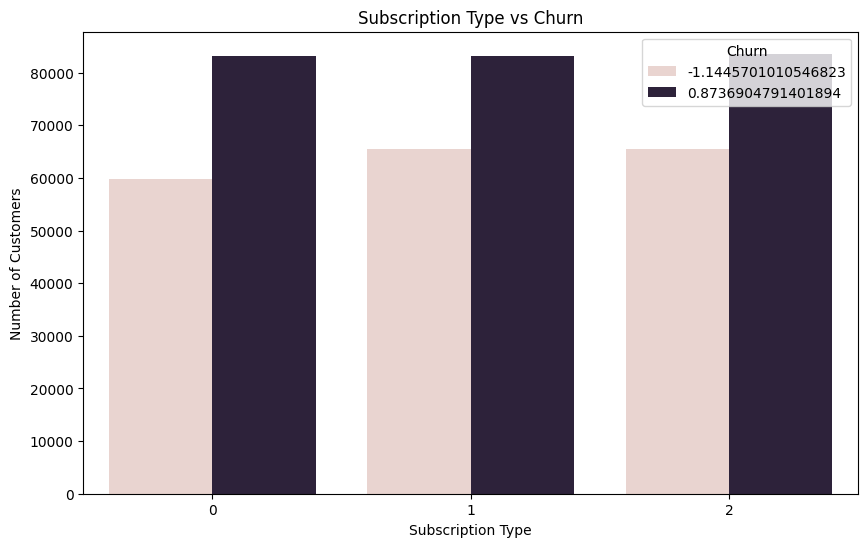

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Subscription Type', hue='Churn')
plt.title('Subscription Type vs Churn')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Customers')
plt.show()


Subscription Type Distribution Among Customers

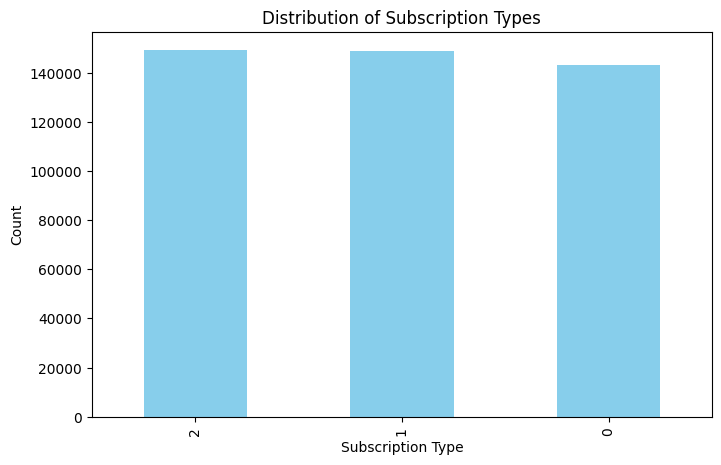

In [ ]:
dataset['Subscription Type'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title('Distribution of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()


In [ ]:
dataset.to_csv("cleaned_churn_data.csv", index=False)
print("✅ Cleaned dataset saved successfully as 'cleaned_churn_data.csv'!")

✅ Cleaned dataset saved successfully as 'cleaned_churn_data.csv'!
